Plot some of the products for presentations

In [1]:
import rasterio
import numpy
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio.plot as plot

# Setup Paths to Data

In [2]:
DATA_DIR = Path(f'data/asf_data_reprojected/')
DATA_DIR.exists()

True

In [3]:
hh_paths = sorted(list(DATA_DIR.glob('*/*hh*.tif')))
hv_paths = sorted(list(DATA_DIR.glob('*/*hv*.tif')))
vv_paths = sorted(list(DATA_DIR.glob('*/*vv*.tif')))
hv_paths

[PosixPath('data/asf_data_reprojected/hv/ALOS1_RTC_hv_20070830.tif'),
 PosixPath('data/asf_data_reprojected/hv/ALOS1_RTC_hv_20080717.tif'),
 PosixPath('data/asf_data_reprojected/hv/ALOS1_RTC_hv_20100723.tif'),
 PosixPath('data/asf_data_reprojected/hv/ALOS1_RTC_hv_20100907.tif')]

In [4]:
CHANGE_DIR = Path('out/change_maps')
CHANGE_DIR.mkdir(exist_ok=True, parents=True)

In [5]:
PLOT_DIR = Path('plots')
PLOT_DIR.mkdir(exist_ok=True, parents=True)

In [6]:
POL = 'hh'
INDEX = 0

# Read Tifs

In [7]:
def read_arr(path):
    with rasterio.open(path) as ds:
        arr = (ds.read(1))
    return arr
hv_ts = list(map(read_arr, hv_paths))
hh_ts = list(map(read_arr, hh_paths))
vv_ts = list(map(read_arr, vv_paths))

In [8]:
with rasterio.open(hh_paths[0]) as ds:
    transform = ds.transform

In [9]:
df_all = gpd.read_file(CHANGE_DIR/f'{POL}/{POL}_change_map_combined_shp')
df_all.head()

,label,date,geometry
0,1,2008-07-17,"POLYGON ((670074.562 546994.438, 670164.562 54..."
1,1,2008-07-17,"POLYGON ((670674.562 546784.438, 670794.562 54..."
2,1,2008-07-17,"POLYGON ((670344.562 546604.438, 670524.562 54..."
3,1,2008-07-17,"POLYGON ((669414.562 546214.438, 669534.562 54..."
4,2,2010-07-23,"POLYGON ((670764.562 546124.438, 670824.562 54..."


In [10]:
date_dict = {k: date_str for (k, date_str) in enumerate(sorted(df_all.date.unique()))}
date_dict

{0: '2008-07-17', 1: '2010-07-23', 2: '2010-09-07'}

In [11]:
df = gpd.read_file(CHANGE_DIR/f'{POL}/{POL}_{INDEX}_{date_dict[INDEX]}')
df.head()

,label,geometry
0,1.0,"POLYGON ((670074.562 546994.438, 670164.562 54..."
1,1.0,"POLYGON ((670674.562 546784.438, 670794.562 54..."
2,1.0,"POLYGON ((670344.562 546604.438, 670524.562 54..."
3,1.0,"POLYGON ((669414.562 546214.438, 669534.562 54..."
4,1.0,"POLYGON ((672744.562 546004.438, 672894.562 54..."


<AxesSubplot:>

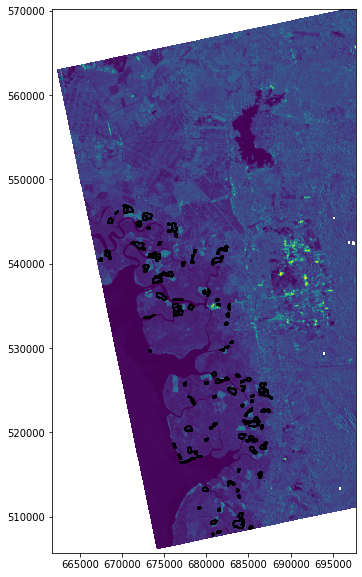

In [12]:
X = hh_ts[INDEX]

fig, ax = plt.subplots(figsize=(10, 10))
plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)

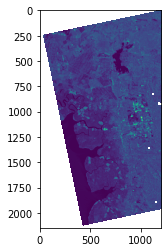

In [13]:
plt.imshow(X)

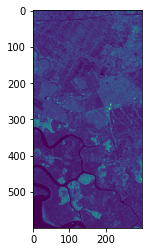

In [14]:
sy = np.s_[500: 1100]
sx = np.s_[300: 600]

plt.imshow(X[sy, sx])

In [15]:
(xmin, xmax), (ymin, ymax) = rasterio.transform.xy(transform, [sy.start, sy.stop], [sx.start, sx.stop])

Text(272.5751396648045, 0.5, 'Easting')

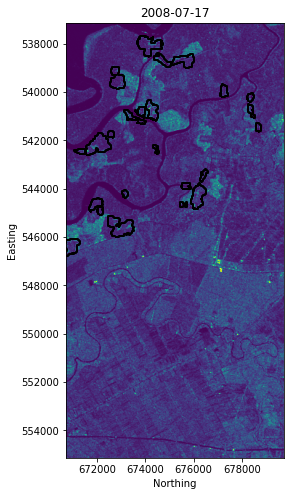

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
X = hh_ts[INDEX]

plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title(date_dict[INDEX])
ax.set_xlabel('Northing')
ax.set_ylabel('Easting')

Text(272.5751396648045, 0.5, 'Easting')

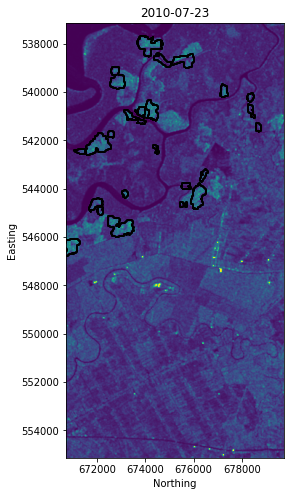

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
X = hh_ts[INDEX + 1]
plot.show(X, transform=transform, ax=ax)
df.plot(ax=ax, edgecolor='black', facecolor=(0, 0, 0, 0), lw=2, zorder=2)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title(date_dict[INDEX+1])

ax.set_xlabel('Northing')
ax.set_ylabel('Easting')

Text(279.8660714285716, 0.5, 'Easting')

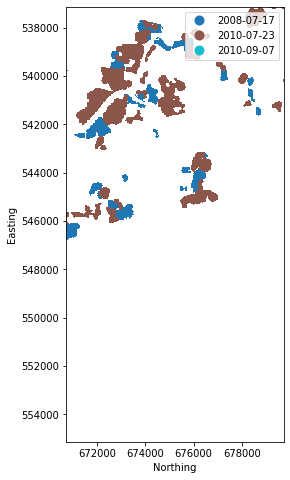

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

df_all.plot(ax=ax, column='date', legend=True)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_xlabel('Northing')
ax.set_ylabel('Easting')